<a href="https://colab.research.google.com/github/gomdoori/AI/blob/main/2024_Deeplearning_CIFAR10_Tuning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
# 디바이스 할당
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# 라이브러리 임포트
import torchvision.datasets as datasets

trans = transforms.Compose([transforms.ToTensor()])

data_root = './data'
train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download=True, transform = trans)

test_set = datasets.CIFAR10(
    root = data_root, train = False,
    download=True, transform = trans)

100%|██████████| 170498071/170498071 [00:02<00:00, 70394082.34it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
batch_size = 128

train_loader = DataLoader(
    train_set, batch_size= batch_size,
    shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size= batch_size,
    shuffle = False
)

In [ ]:
# class CNN1(nn.Module):
#     def __init__(self):
#         super(CNN1, self).__init__()

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         self.l1 = nn.Linear(in_features=128*4*4,out_features=128)
#         self.l2 = nn.Linear(in_features=128,out_features=10)

#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = self.layer1(x)

#         x = x.view(x.size(0),-1)

#         x = self.l1(x)
#         x = self.relu(x)
#         x = self.l2(x)
#         return x

In [ ]:
# class CNN1(nn.Module):
#     def __init__(self):
#         super(CNN1, self).__init__()

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.2),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.3),
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.4)
#         )

#         self.l1 = nn.Linear(in_features=128*4*4,out_features=128)
#         self.l2 = nn.Linear(in_features=128,out_features=10)

#         self.relu = nn.ReLU()

#         self.dropout1 = nn.Dropout(0.4)

#     def forward(self, x):
#         x = self.layer1(x)

#         x = x.view(x.size(0),-1)

#         x = self.l1(x)
#         x = self.relu(x)
#         x = self.dropout1(x)
#         x = self.l2(x)
#         return x

In [ ]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()

        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            self.bn1,
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            self.bn2,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            self.bn3,
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            self.bn4,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            self.bn5,
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            self.bn6,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4)
        )

        self.l1 = nn.Linear(in_features=128*4*4,out_features=128)
        self.l2 = nn.Linear(in_features=128,out_features=10)

        self.relu = nn.ReLU()

        self.dropout1 = nn.Dropout(0.4)

    def forward(self, x):
        x = self.layer1(x)

        x = x.view(x.size(0),-1)

        x = self.l1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.l2(x)
        return x

In [ ]:
# 난수 고정
torch.cuda.manual_seed(123)

model = CNN1()
model.to(device)
lr = 1e-3

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

history= np.zeros((0,5))

In [ ]:
num_epochs = 20
# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm
for epoch in range(num_epochs):
  train_acc, train_loss = 0, 0
  test_acc, test_loss = 0, 0
  n_train, n_test = 0, 0

  for images, labels in tqdm(train_loader):
    n_train += len(labels)

    inputs = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss_model = criterion(outputs, labels)
    loss_model.backward()
    optimizer.step()
    pred = outputs.max(axis=1)[1]
    train_loss += loss_model.item()
    train_acc += (pred == labels).sum().item()
  for images_test, labels_test in test_loader:
    n_test += len(labels_test)

    inputs_test = images_test.to(device)
    labels_test = labels_test.to(device)

    outputs_test = model(inputs_test)

    loss_test_model = criterion(outputs_test, labels_test)

    pred_test = outputs_test.max(axis=1)[1]

    test_loss +=  loss_test_model.item()
    test_acc +=  (pred_test == labels_test).sum().item()

  train_acc = train_acc / n_train
  test_acc = test_acc / n_test
  train_loss = train_loss / n_train
  test_loss = test_loss / n_test
  print(f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f}, loss_test: {test_loss:.5f}')
  item = np.array([epoch+1 , train_loss, train_acc, test_loss, test_acc])
  history = np.vstack((history, item))

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.01201, loss_test: 0.00983


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.00883, loss_test: 0.00838


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.00764, loss_test: 0.00761


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.00689, loss_test: 0.00705


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.00638, loss_test: 0.00665


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.00596, loss_test: 0.00651


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.00568, loss_test: 0.00626


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.00540, loss_test: 0.00580


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.00512, loss_test: 0.00549


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.00490, loss_test: 0.00566


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.00470, loss_test: 0.00535


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.00450, loss_test: 0.00538


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.00434, loss_test: 0.00547


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.00424, loss_test: 0.00525


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.00407, loss_test: 0.00516


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.00393, loss_test: 0.00515


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.00381, loss_test: 0.00514


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.00368, loss_test: 0.00492


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.00357, loss_test: 0.00491


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.00357, loss_test: 0.00485


In [ ]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 0.00983  정확도 : 0.55790
최종상태 : 손실 : 0.00485  정확도 : 0.79880


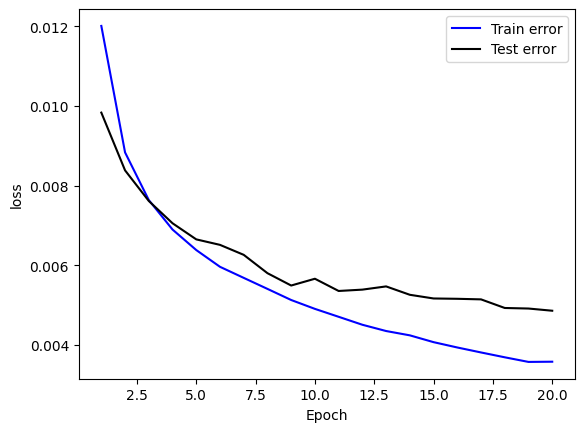

In [ ]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='Train error')
plt.plot(history[:,0], history[:,3], 'k', label='Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

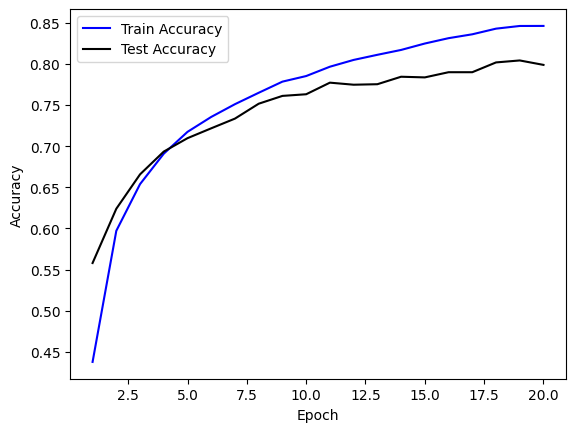

In [ ]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='Train Accuracy')
plt.plot(history[:,0], history[:,4], 'k', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()